In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [78]:
df = pd.read_csv('dataaa.csv')
df.sample(7)

,x,y,z
353,138.207377,451.476703,b
166,394.131681,271.591179,a
122,279.755055,235.419675,a
331,628.798933,395.664905,a
172,331.345815,334.086404,a
329,614.101993,429.549006,a
454,617.906140,180.824214,b


In [79]:
X = df[['x','y']]
y = df['z'] =='a'

(array([[ 35.,  49.,  76.,  47.,  56.,  33.,  69.,  90.,  63.,  19.],
        [ 32.,  73.,  96.,  79.,  71., 116.,  68.,   2.,   0.,   0.]]),
 array([-42.80817761,  36.2965574 , 115.4012924 , 194.50602741,
        273.61076242, 352.71549743, 431.82023243, 510.92496744,
        590.02970245, 669.13443746, 748.23917247]),
 <a list of 2 BarContainer objects>)

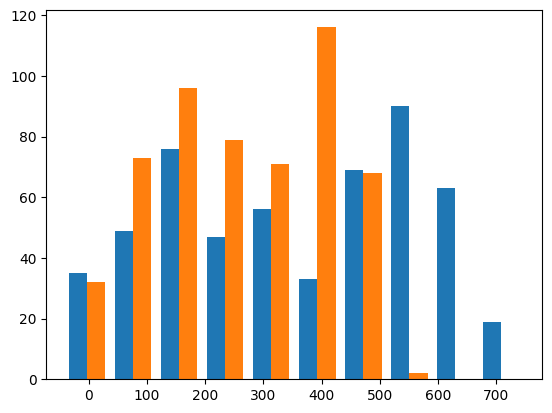

In [80]:
plt.hist(X)

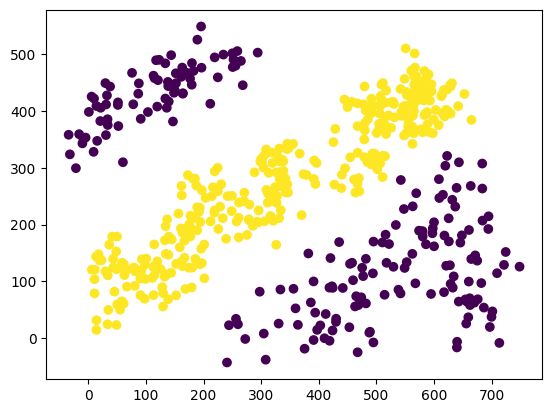

In [81]:
plt.scatter(X['x'],X['y'], c=y)

# scaler =StandardScaler()

In [110]:
scaler =StandardScaler()

In [111]:
scaled_x = scaler.fit_transform(X)

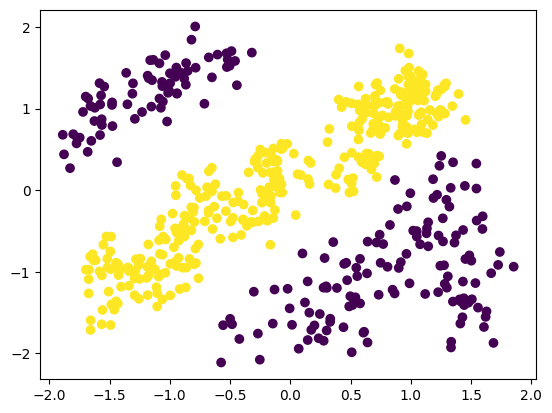

In [112]:
plt.scatter(scaled_x[:,0],scaled_x[:,1],c=y)

In [113]:
quant = QuantileTransformer()

In [114]:
quantiled = quant.fit_transform(X)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (537). n_quantiles is set to n_samples.
  warnings.warn(


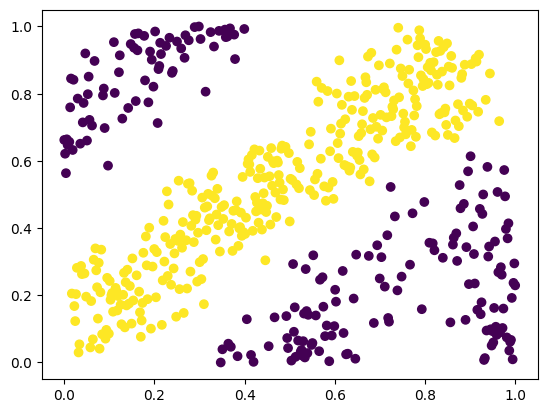

In [115]:
plt.scatter(quantiled[:,0],quantiled[:,1],c=y)

# Pipe line

In [116]:
X = df[['x','y']]
y = df['z'] =='a'

In [117]:
pipe = Pipeline([
           ('scaling',QuantileTransformer()),
           ('algo',LogisticRegression()) 
])

In [118]:
pipe.fit(X,y)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (537). n_quantiles is set to n_samples.
  warnings.warn(


Pipeline(steps=[('scaling', QuantileTransformer()),
                ('algo', LogisticRegression())])

In [119]:
yp =pipe.predict(X)

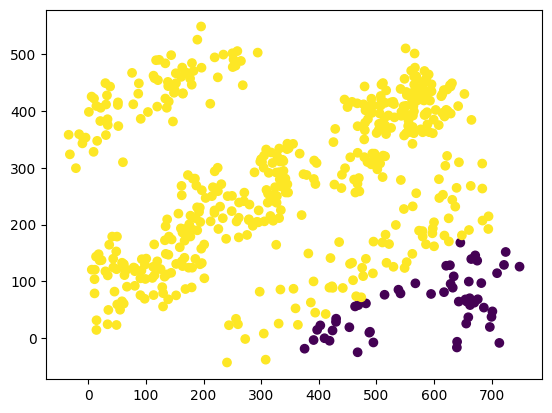

In [120]:
plt.scatter(X['x'],X['y'],c=yp)

# Polynomial Nomial

In [121]:
pipe = Pipeline([
           ('scaling',PolynomialFeatures()),
           ('algo',LogisticRegression()) 
])

In [122]:
pipe.fit(X,y)

Pipeline(steps=[('scaling', PolynomialFeatures()),
                ('algo', LogisticRegression())])

In [123]:
ypp= pipe.predict(X)

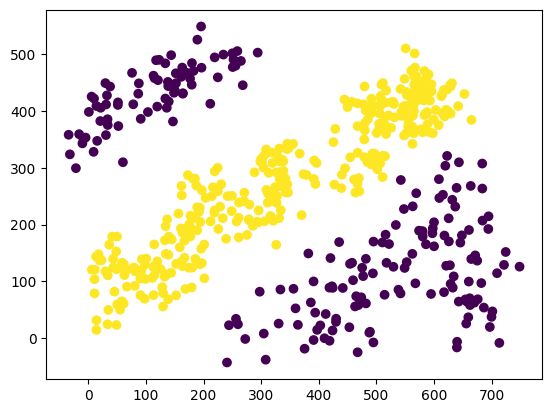

In [124]:
plt.scatter(X['x'],X['y'],c=ypp)